In [1]:
## importing necessary libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread

In [2]:
reviews = pd.read_csv('reviews.txt',error_bad_lines=False)
reviews

,x
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...
...,...
29993,much faster and stable than the fire tv stick....
29994,It was a great product but I purchased it for ...
29995,Great product worth the money to pickup one of...
29996,This is the best device for watching Netflix c...


In [3]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [4]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [5]:
reviews.dtypes

x    object
dtype: object

In [6]:
text = ' '.join(reviews.x)
##text

In [7]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(text)
sentences[1:20]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person.',
 'Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI.',
 'He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it.",
 'This tablet is a great value.We are Prime Members and that is where this tablet SHINES.',
 'I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model.',
 'The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.',
 'I bought this for my grand daughter when she comes over to vis

In [9]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df.head()

,sentence
0,This product so far has not disappointed.
1,My children love to use it and I like the abil...
2,great for beginner or experienced person.
3,Bought as a gift and she loves it Inexpensive ...
4,"He was thrilled with it, learn how to Skype on..."


In [12]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
##affinity_scores

In [13]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

In [14]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
            return sent_score

In [16]:
sentence = nlp("I am happy that I didn't to shopping, it is annoying")
sent_score=[]
for word in sentence:
    score = sentiment_lexicon.get(word.lemma_,0)
    sent_score.append(score)
sent_score

[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2]

In [17]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df.head()

,sentence,sentiment_value
0,This product so far has not disappointed.,0
1,My children love to use it and I like the abil...,0
2,great for beginner or experienced person.,3
3,Bought as a gift and she loves it Inexpensive ...,0
4,"He was thrilled with it, learn how to Skype on...",0


In [18]:
## how many words are in each sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.sort_values(by = 'sentiment_value').tail(10)
sent_df['sentiment_value'].describe()
## mean 0.29  means overall reviews are negative

count    70666.000000
mean         0.292857
std          0.888031
min         -3.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: sentiment_value, dtype: float64

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

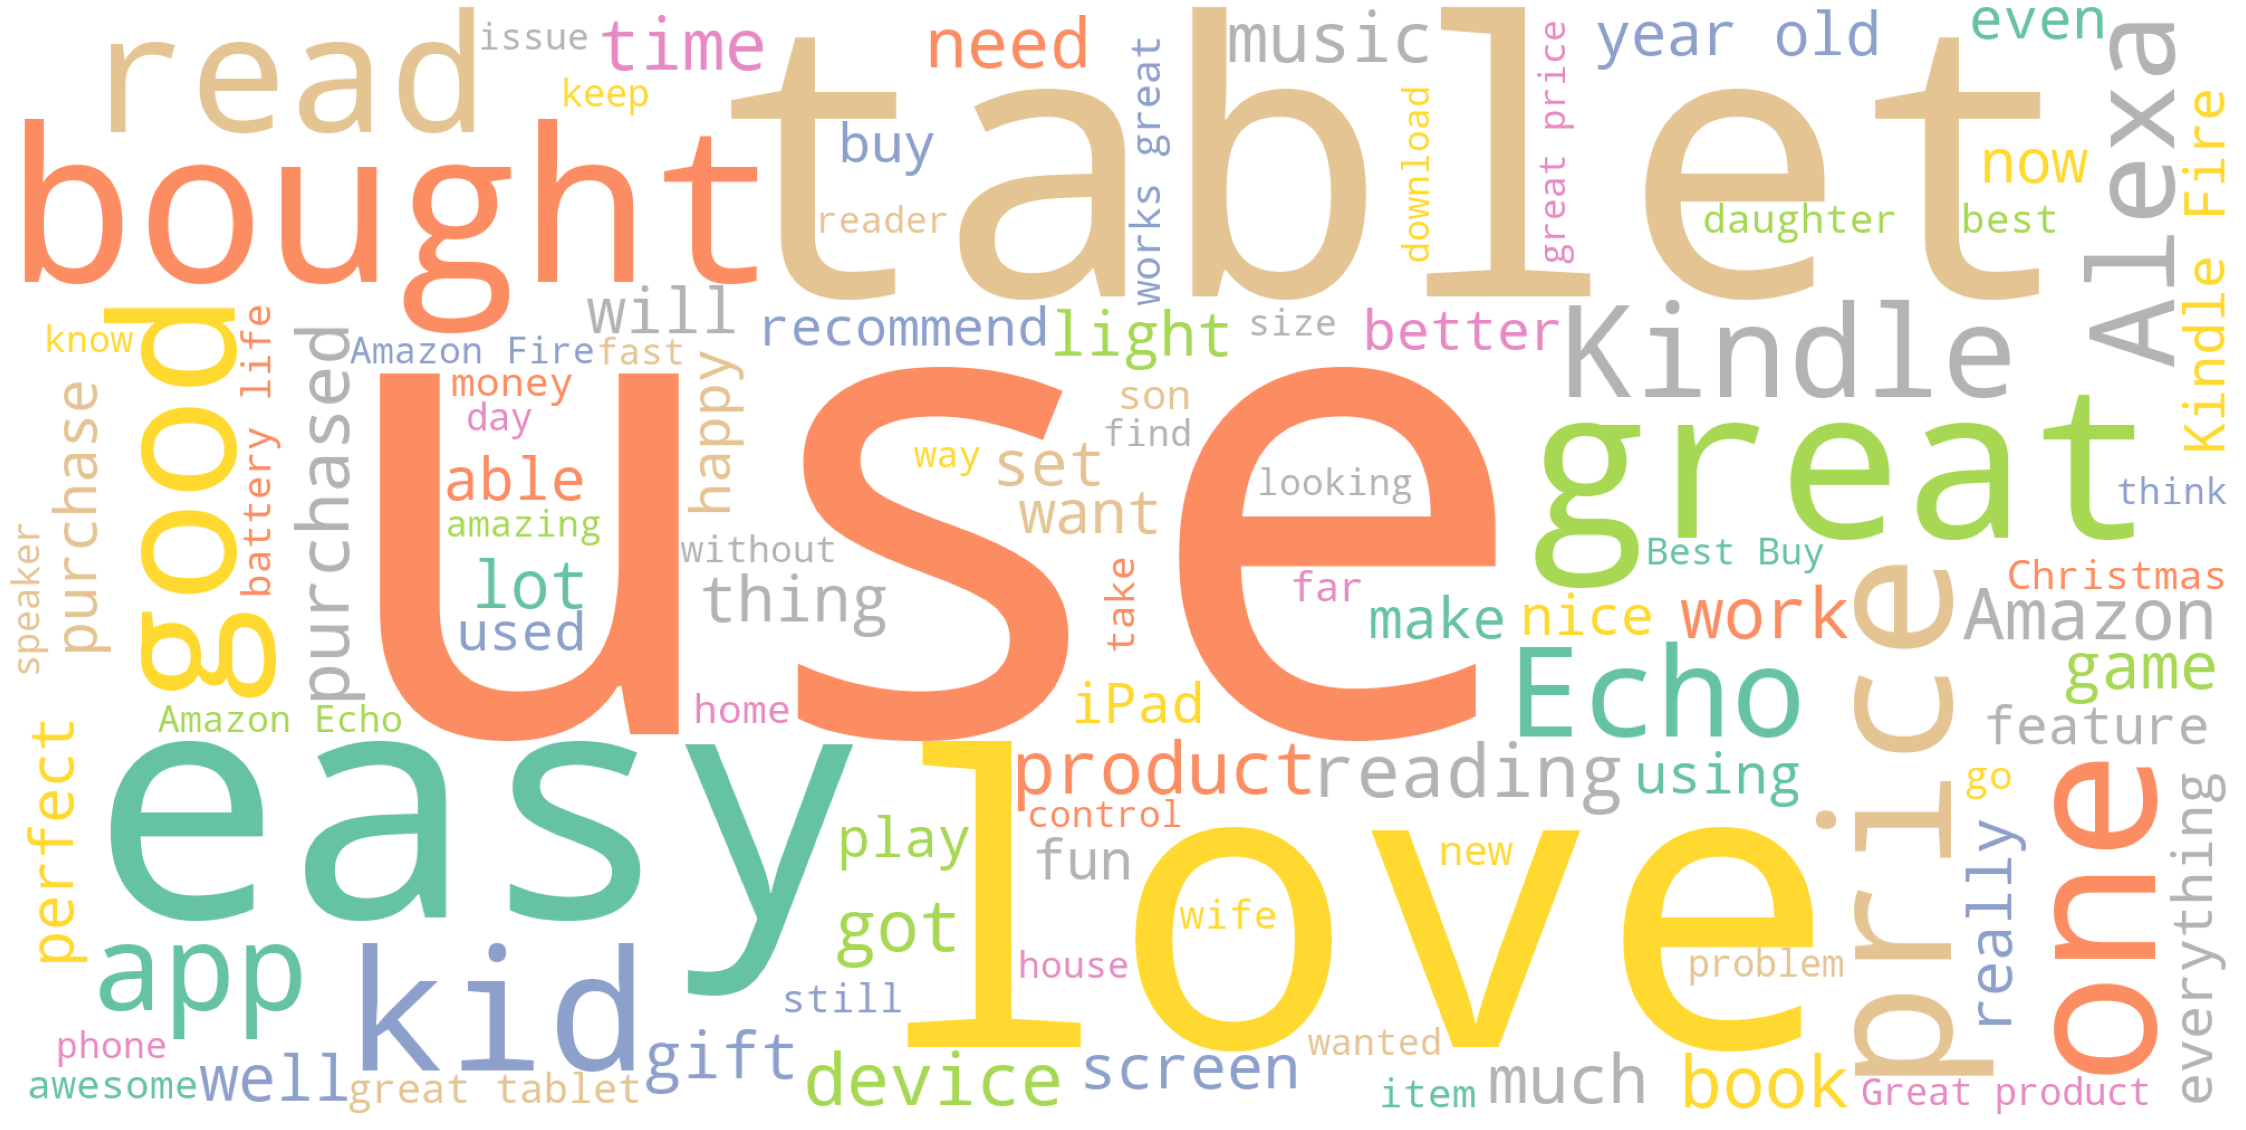

In [20]:
stopwords = STOPWORDS
wordcloud = WordCloud(width = 2000, height = 1000, background_color = 'white',max_words = 100, colormap = 'Set2',stopwords = stopwords).generate(text)
plot(wordcloud)

In [21]:
##Part Of Speech Tagging

nlp = spacy.load('en_core_web_sm')

one_block = sentences[1]
sec_block = sentences[150]
block = one_block.join(sec_block)
doc_block = nlp(block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [24]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[0:100])

['children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease.tMy', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease.tMy', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'children', 'love', 'use', 'like', 'ability', 'monitor']


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

## Counting tokens
cv = CountVectorizer()
x = cv.fit_transform(nouns_verbs)
sum_words = x.sum(axis = 0)
words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]

In [28]:
words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word','count']
wf_df[0:10]

,word,count
0,children,76
1,love,76
2,use,76
3,like,76
4,ability,76
5,monitor,76
6,control,76
7,content,76
8,see,76
9,ease,42


<AxesSubplot:title={'center':'Top'}, xlabel='word'>

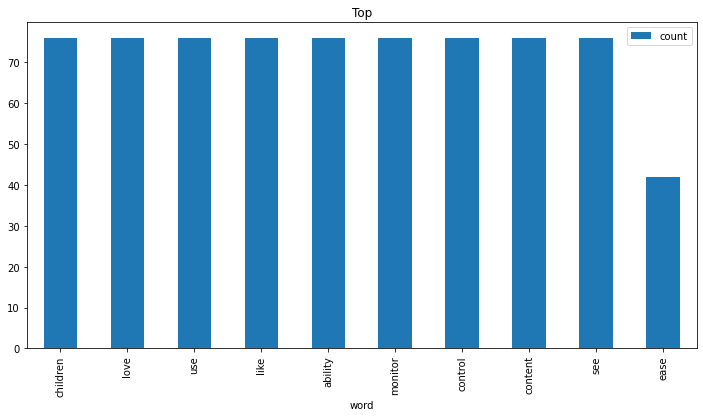

In [30]:
## Visualizing results

wf_df[0:10].plot.bar(x = 'word', figsize = (12,6), title = 'Top')